# What we're covering in the Scikit-Learn Introduction
*This notebook outlines the content convered in the Scikit-Learn Introduction.

*It's a quick stop to see all the Scikit-Learn functions and modules for each section outlined.

*What we're covering follows

0.An end to end scikit-learn workflow
1.getting the data ready
2.choosing the right estimator/algorithm for our problems
3.fit the model/algorithm and use it to make predictions on our data
4.evaluate the model
5.improve the model
6.save and load a trained model
7.putting it all together

# 0.An end to end scikit-learn workflow


In [1]:
#standard inputs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#1.getting the data ready
import pandas as pd
import numpy as np

In [3]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#create X (features matrix which means all the headings like age,sex,cp.....till thal)
x=heart_disease.drop("target",axis=1)

#create y which is label matrix(target)
y=heart_disease["target"]


In [5]:
#2.choosing the right model and hyperparameters for our problems
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

#we'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
#3.fit the model/algorithm and use it to make predictions on our data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [7]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [8]:
#make a prediction
#y_label=clf.predict(np.array([0,2,3,4]))
#the above code will show error of size difference 

In [9]:
#we can use test data for the same
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3


In [10]:
y_preds=clf.predict(x_test)
y_preds


array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [11]:
y_test

213    0
210    0
97     1
31     1
249    0
      ..
201    0
60     1
171    0
224    0
141    1
Name: target, Length: 61, dtype: int64

In [12]:
#4.evaluate the model on the train and test data
clf.score(x_train,y_train)

1.0

In [13]:
clf.score(x_test,y_test)

0.7540983606557377

In [14]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75        34
           1       0.67      0.89      0.76        27

    accuracy                           0.75        61
   macro avg       0.77      0.77      0.75        61
weighted avg       0.79      0.75      0.75        61



In [15]:
confusion_matrix(y_test,y_preds)

array([[22, 12],
       [ 3, 24]], dtype=int64)

In [16]:
accuracy_score(y_test,y_preds)

0.7540983606557377

In [17]:
#5>Imporve the model


#try different amount of n_estimators
np.random.seed(2)
for i in range(10,100,10):
    print(f"trying model with {i} estimators....")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set:{clf.score(x_test,y_test)*100:.2f}%")
    print("")

trying model with 10 estimators....
Model accuracy on test set:78.69%

trying model with 20 estimators....
Model accuracy on test set:78.69%

trying model with 30 estimators....
Model accuracy on test set:75.41%

trying model with 40 estimators....
Model accuracy on test set:75.41%

trying model with 50 estimators....
Model accuracy on test set:78.69%

trying model with 60 estimators....
Model accuracy on test set:75.41%

trying model with 70 estimators....
Model accuracy on test set:72.13%

trying model with 80 estimators....
Model accuracy on test set:75.41%

trying model with 90 estimators....
Model accuracy on test set:73.77%



In [18]:
#6.save and load a trained model(crestes a new file)

import pickle

pickle.dump(clf,open("random_forest_model.pkl","wb"))

In [19]:
loaded_model=pickle.load(open("random_forest_model.pkl","rb"))
loaded_model.score(x_test,y_test)

0.7377049180327869

# 1.getting the data to be rady to use it witl ML
three mainthing we need to do:
    1.split hte data into features and labels (usually'x & y')
    2.filling or removing missing values
    3.Convertinh non-numerical values to numerical values(also called feaure encoding)
    


In [20]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
x=heart_disease.drop("target" ,axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
y=heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
#split the data into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [25]:
x.shape

(303, 13)

In [26]:
len(heart_disease)

303

In [27]:
#this means in x_train 242 i.e.80% of the model went into training


##

# make sure its alll numerical

In [28]:
car_sales=pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [29]:
len(car_sales)

1000

In [30]:
car_sales.dtypes#we need to convert object into int


Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [31]:
#splitx/y
x=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

#split into training and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [32]:
#building ML model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()#required in the code
#model.fit(x_train,y_train)
#model.score(x_test,y_test)
#this code gives the error :"could not convert string to float: 'Honda'"so we do the steps below

In [33]:
#way1


#turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                             remainder="passthrough")

transformed_x=transformer.fit_transform(x)
transformed_x

#so in the above code we have transformed the make color and door columns but not the odometer column 
#we first converted them into categories and then use 'OneHotEncoding' to convert categories into numbers
#explained in video '110'

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [34]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [35]:
#way2
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [36]:
# lest refit the model
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model.fit(x_train, y_train)

RandomForestRegressor()

In [37]:
model.score(x_test,y_test)

0.3235867221569877

# 1.2what if there were missing values
1.Fill them with some value(also known as imputation)
2>remove the samples with missing data all together

In [38]:
car_sales_missing=pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [39]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [40]:
#splitx/y
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]


In [41]:
#lets try and convert it into numbers
#turn categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                             remainder="passthrough")

transformed_x=transformer.fit_transform(x)
transformed_x
#input contains nan so we cannot process the data

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

## option1:fill missing data with pandas

In [42]:
#fill "Make column"
car_sales_missing["Make"].fillna("missing",inplace=True)

#fill the "Colour column"
car_sales_missing["Colour"].fillna("missing",inplace=True)

car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

car_sales_missing["Doors"].fillna(4,inplace=True)

In [43]:
#check the data frame again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [44]:
#removing rows with missing price values
car_sales_missing.dropna(inplace=True)

In [45]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [46]:
len(car_sales_missing)

950

In [47]:
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [48]:
#lets try and convert it into numbers
#turn categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                             remainder="passthrough")

transformed_x=transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## option2:fill missing values with scikit learn

In [49]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [50]:
# Reimport the DataFrame
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [51]:
# Drop the rows with missing in the Price column
car_sales_missing.dropna(subset=["Price"], inplace=True)

In [52]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [53]:
# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [54]:
from sklearn.impute import SimpleImputer

# Create categorical variable imputer
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")

# Create Door column imputer
door_imputer = SimpleImputer(strategy="constant", fill_value=4)

# Create Odometer (KM) column imputer
num_imputer = SimpleImputer(strategy="mean")

In [55]:
# Define different column features
categorical_features = ["Make", "Colour"]
door_feature = ["Doors"]
numerical_feature = ["Odometer (KM)"]

In [56]:
from sklearn.compose import ColumnTransformer

# Create series of column transforms to perform
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, categorical_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, numerical_feature)])

In [57]:
# Find values to fill and transform training data
filled_X_train = imputer.fit_transform(X_train)

# Fill values in to the test set with values learned from the training set
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [58]:
# Get our transformed data array's back into DataFrame's
filled_X_train_df = pd.DataFrame(filled_X_train, 
                                 columns=["Make", "Colour", "Doors", "Odometer (KM)"])

filled_X_test_df = pd.DataFrame(filled_X_test, 
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
filled_X_train_df.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [59]:
# Check missing data in the testing set
filled_X_test_df.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [60]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [61]:
filled_X_train_df.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,71934.0
1,Toyota,Red,4.0,162665.0
2,Honda,White,4.0,42844.0
3,Honda,White,4.0,195829.0
4,Honda,Blue,4.0,219217.0


In [62]:
# Now let's one hot encode the features with the same code as before 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                remainder="passthrough",
                                sparse_threshold=0) # return a sparse matrix or not

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(filled_X_train_df)
transformed_X_test = transformer.transform(filled_X_test_df)

# Check transformed and filled X_train
transformed_X_train

array([[0.0, 1.0, 0.0, ..., 1.0, 0.0, 71934.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 162665.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 42844.0],
       ...,
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 196225.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 133117.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 150582.0]], dtype=object)

In [63]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use the transformed data (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

## 2.choosing the right estimator/algorithm for your problem

* sklearn refers to machine learning models,algorithms as estimators
* classification problem-predicting a category(heart disease or not)
* sometimes you will see clf(short for classifier)used as a classification estimator
* regression problem - predicting a number (selling price of a car)

* to know which algorithm to us efollow the link https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## 2.1 Picking a machine learning model for a regression problem

* using the california house dataset=https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

In [64]:
#get california housing dataset
from sklearn.datasets import fetch_california_housing
housing= fetch_california_housing()
housing


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [65]:
housing_df=pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = pd.Series(housing["target"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [66]:
housing_df["MedHouseVal"]=housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.847


In [67]:
housing_df=housing_df.drop("MedHouseVal",axis=1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [68]:
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = Ridge()
model.fit(x_train, y_train)

# Check the score of the model (on the test set)
# The default score() metirc of regression aglorithms is R^2
model.score(x_test, y_test)

0.5758549611440126

#improving the score
* what if ridge didnt work or the score didnt meet our requirements
* well,we could always try different model.....
* how about we try an ensemble model(an ensemble is combination of smaller models to try ann make better model
* Sklearn ensemble models can be found here:https://scikit-learn.org/stable/modules/ensemble.html




In [69]:
#import the randomforstregresser model class from the ensemble module

from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Check the score of the model (on the test set)
# The default score() metirc of regression aglorithms is R^2
model.score(x_test, y_test)

0.8065734772187598

#2.2 picking a ML model for Classification:https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html:refer the doc for selection of algorithm

In [70]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [71]:
len(heart_disease)

303

In [72]:
# Import LinearSVC from the svm module
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = LinearSVC(max_iter=1000, # iterations on the data, 1000 is the default
                dual="auto") # dual="auto" chooses best parameters for the model automatically
clf.fit(x_train, y_train)

# Check the score of the model (on the test set)
clf.score(x_test, y_test)

0.8688524590163934

In [73]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [74]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = RandomForestClassifier(n_estimators=100) # 100 is the default, but you could try 1000 and see what happens
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

#note 
* If you have structured data use ensemble methods
* if you have unstructured data,use deep learning or transfer learning 

## 3.fittng the model/algorithm and use it to make predictions

In [75]:
### 3.1Fitting the model to the data
#x=features,feature variables ,data
#y=labels,targets,target variables

from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

In [76]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [77]:
y.head(),y.tail()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64,
 298    0
 299    0
 300    0
 301    0
 302    0
 Name: target, dtype: int64)

## make predictions based on the machine laerning model

#using a trained model to make predictions
* 2. ways to make predictions:
 1.predict()
    2.predict_proba()

In [78]:
#use a trained model to make predictions
#clf.predict(np.array([1,7,8,3,4]))
#this does not work........

In [79]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [80]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [81]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [82]:
#compare predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [83]:
clf.score(x_test,y_test)

0.8524590163934426

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

## Make predictionswith predict_proba()

In [85]:
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [86]:
#lets predict hte same data
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [87]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [88]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

'predict()'can also be used for regeresion model

In [89]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [90]:
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(x_train,y_train)

# Check the score of the model (on the test set)
y_preds=model.predict(x_test)

In [91]:
np.array(y_preds[:10])

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [92]:
len(y_preds)

4128

In [93]:
#compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32659871732073664

In [94]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4.0.evaluating a model
there are three ways to evaluate scikit-learn models/estimators
* 1.estimator's build-in 'score()' method
 * 2.the 'scoring' parameter
 * 3.Problem-specific metric functions
 
 you can read more about it here:https://scikit-learn.org/stable/modules/model_evaluation.html

In [95]:
## 4.1evaaluating a model with score method

In [96]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = RandomForestClassifier(n_estimators=2500)

# Check the score of the model (on the test set)
clf.fit(x_test, y_test)

RandomForestClassifier(n_estimators=2500)

In [97]:
#the highest value for the .score() method is 1.0 and lowest is 0.0
clf.score(x_train,y_train)

0.7933884297520661

In [98]:
clf.score(x_test,y_test)

1.0

lets use the score method on regression problem

In [99]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = RandomForestRegressor(n_estimators=100)

# Check the score of the model (on the test set)
model.fit(x_test, y_test)

RandomForestRegressor()

In [100]:
model.score(x_test,y_test)

0.9240786637931034

In [101]:
model.score(x_test,y_test)

0.9240786637931034

## 4.2 evaluating a model using the scoring() parameter

In [102]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)

# Check the score of the model (on the test set)
clf.fit(x_train, y_train)


RandomForestClassifier()

In [103]:
clf.score(x_test,y_test)

0.8524590163934426

In [104]:
cross_val_score(clf,x,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [105]:
np.random.seed(42)
#single training and test split score
clf_single_score=clf.score(x_test,y_test)

#take the mean of the 5-fold cross-validation score
clf_cross_val_score=np.mean(cross_val_score(clf,x,y,cv=5))

#compare the two
clf_cross_val_score,clf_cross_val_score


(0.8248087431693989, 0.8248087431693989)

In [106]:
#scoring parameter set to none by default
cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [107]:
#scoring parameter set to none by default
cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.81967213, 0.86885246, 0.80327869, 0.76666667, 0.8       ])

###4.2.1 Classification model evaluation metrics
1.accuracy
2.Area under ROC
3.confusion matrix
4.classification report

In [108]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


# Instantiate and fit the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)

cross_val_score=cross_val_score(clf,x,y,cv=5)

In [109]:
np.mean(cross_val_score)

0.8248087431693989

In [110]:
print(f"Heart Disese Classifier cross-validated Accuracy:{np.mean(cross_val_score)*100:.2f}%")

Heart Disese Classifier cross-validated Accuracy:82.48%


**Area under the receiver operating charasteristic curve

=Area under the curve(AUC)
-ROC curve

ROC curves are a comparision of a models true positive rate(tpr) Vs a models false +ve rate(fpr)

True +ve: model predicts 1 when truth is 1
fales +ve: model predicts 1 when truth is 0
True -ve: model predicts 0 when truth is 0
False -ve: model predicts 0 when truth is 1

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [112]:
from sklearn.metrics import roc_curve

#fit he classifier
clf.fit(x_train,y_train)

#make prediction with probabilities
y_probs=clf.predict_proba(x_test)
y_probs[:10],len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [113]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [114]:
#calculate the fpr ,tpr and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

#check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

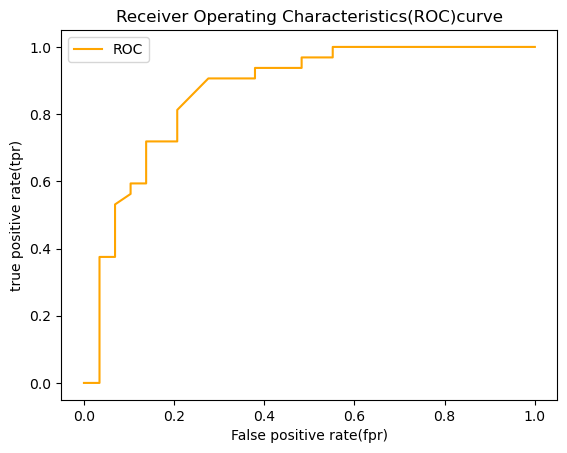

In [115]:
#create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    '''Plots a ROC curve given the FPR and TPR of a model'''
    
    #plot the ROC curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    
    #plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="guessing")
    
    #plot the line with no predictive power (baseline)
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("true positive rate(tpr)")
    plt.title("Receiver Operating Characteristics(ROC)curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)    

In [116]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)#(this calsulate the whole area under the yellow curve)

0.8669181034482759

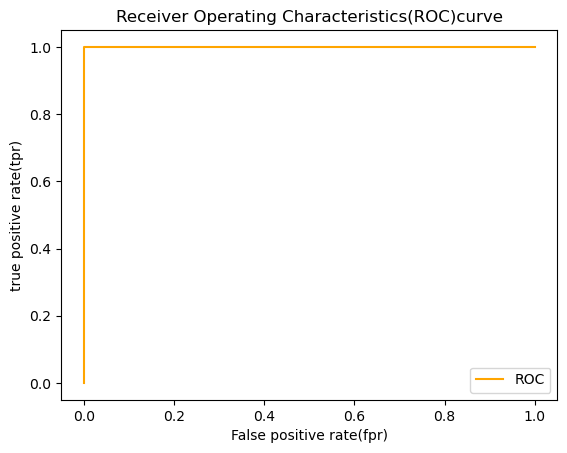

In [117]:
#plot prefect ROC curve and AUC score

fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [118]:
#prefect AUC curve
roc_auc_score(y_test,y_test)

1.0

*confusion matrix*

a confusion matrix is a quick way to compare the labels a model predicts and the acutal labels it was supposed to predict

in essence,giving tyou an idea wheer the model is getting confused



In [119]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [120]:
#visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,rownames=["actual Labels"],
           colnames=["redicted labels"])

redicted labels,0,1
actual Labels,,
0,23,6
1,6,26


<Axes: >

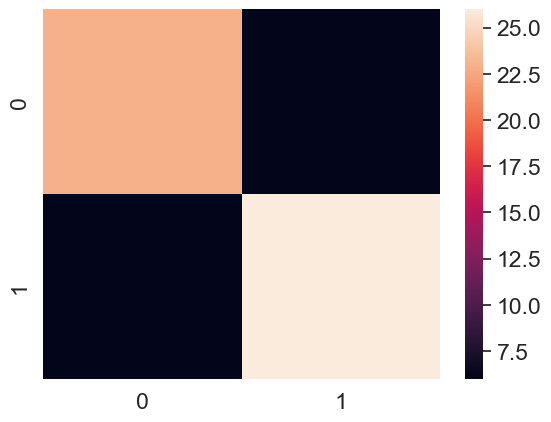

In [121]:
#make confusion matrix as heatmap
import seaborn as sns

#set the font scale
sns.set(font_scale=1.5)

#create a confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)

#plot it using the seaborn
sns.heatmap(conf_mat)

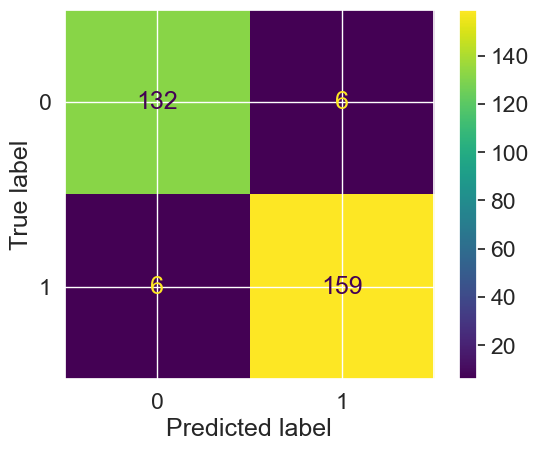

In [122]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

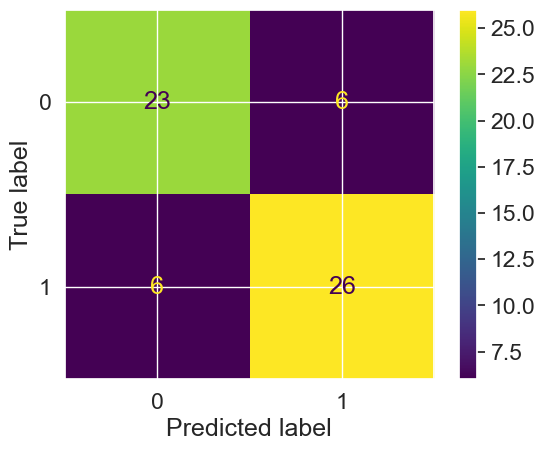

In [123]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds,)

In [124]:
# classification report

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [126]:
# where precision and recall become valuable

disease_true=np.zeros(10000)
disease_true[0]=1#only 1 +vs case

disease_preds=np.zeros(10000)#model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))



D:\data_science\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\data_science\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\data_science\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


## 4.2.2.Regression model evaluation

* R^2(pronounced r square) OR coefficient of determnation
* Mean absolute error(MAE)
* Mean squared error(MSE)

In [127]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=housing_df.drop("target",axis=1)
y=housing_df["target"]

x_train, x_test, y_train, y_test= train_test_split( x, y, test_size=0.2)
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)


RandomForestRegressor()

In [128]:
model.score(x_test,y_test)

0.8065734772187598

In [129]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [130]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [131]:
y_test.mean()

2.0550030959302323

In [132]:
from sklearn.metrics import r2_score

#fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

In [133]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [134]:
r2_score(y_true=y_test,
         y_pred=y_test_mean
        )

0.0

In [135]:
r2_score(y_true=y_test,
         y_pred=y_test
        )

1.0

what does r^2 means=
compares the models predictions to mean of the targets,values can renge from negative infinity(a very poor model) to 1.
eg:if all your model does is predict the mean of the targets.its,R^2 value will be 0ANd if your models predicts a range of numbers its value wil be1

** (ii)MEAn absolute error
MAE is the average of the absolute differences between predictions and actual values

it gives tou an idea of how wrong your models predictions are

In [136]:
#MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae= mean_absolute_error(y_test,y_preds)
mae

0.32659871732073664

In [137]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [138]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [139]:
df=pd.DataFrame(data={"actual values":y_test,
                     "predicted values":y_preds})

df["differences"]=df["predicted values"]-df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [140]:
df["differences"].mean()

0.012048392126937589

In [141]:
#MAE using formulas and differences
np.abs(df["differences"]).mean()


0.32659871732073664

**MSE(Mean SQuare ERROR)**

mse is the mean of the suare of the errors of the acutal and predicted values

In [142]:
#MSE
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse= mean_squared_error(y_test,y_preds)
mse

0.2534678520824551

In [143]:
df["squared_differneces"]=np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differneces
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [144]:
#calcilate MSE by hand

squared=np.square(df["differences"])
squared.mean()

0.2534678520824551

In [145]:
df_large_error=df.copy()
df.iloc[0]["squared_differences"]=16


C:\Users\adity\AppData\Local\Temp\ipykernel_9640\2352612931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[0]["squared_differences"]=16
C:\Users\adity\AppData\Local\Temp\ipykernel_9640\2352612931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[0]["squared_differences"]=16


In [146]:
df_large_error.head()

,actual values,predicted values,differences,squared_differneces
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [147]:
df_large_error.iloc[1:100]=20
df_large_error

,actual values,predicted values,differences,squared_differneces
20046,0.47700,0.493840,0.016840,0.000284
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


## 4.2.3 Finally using hte score parameter

In [148]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier(n_estimators=100)

In [149]:
np.random.seed(42)

#Cross-validation accuracy
cv_acc=cross_val_score(clf,x,y,cv=5,scoring=None)#if scoring =None,estimatord default scoreing evaluation metric is used()
cv_acc#we will get 5 values becz cv=5

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [150]:
#cross-validated accuracy
print(f"The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is:82.48%


In [151]:
np.random.seed(42)
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [152]:
#cross-validated accuracy
print(f"The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is:82.48%


In [153]:
#precision
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision


array([0.76315789, 0.90322581, 0.83870968, 0.79411765, 0.74358974])

In [154]:
#cross-validated precision
print(f"The cross-validated precisoon is:{np.mean(cv_precision)} %")

The cross-validated precisoon is:0.8085601538512754 %


In [155]:
#recall
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall


array([0.87878788, 0.84848485, 0.78787879, 0.78787879, 0.90909091])

In [156]:
#cross-validated reacll
print(f"The cross-validated precisoon is:{np.mean(cv_recall)} %")

The cross-validated precisoon is:0.8424242424242424 %


lets see the scoring() parameter for regression problem

In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=housing_df.drop("target",axis=1)
y=housing_df["target"]

model=RandomForestRegressor(n_estimators=100)


In [158]:
np.random.seed(42)
cv_r2=cross_val_score(model,x,y,cv=3,scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [159]:
#mean absolute error
cv_mae =cross_val_score(model,x,y,cv=3,scoring="neg_mean_squared_error")
np.mean(cv_mae)

-0.4626304189468596

In [160]:
cv_mae

array([-0.51816064, -0.33163551, -0.53809511])

In [161]:
#mean squared error

cv_mae=cross_val_score(model,x,y,cv=3,scoring="neg_mean_squared_error")
np.mean(cv_mae)

-0.4612318847966544

In [162]:
cv_mae

array([-0.51325643, -0.32925916, -0.54118007])

## 4.3 using the different metrics as scilet learn model

In [163]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test= train_test_split( x, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)

clf=RandomForestClassifier()

clf.fit(x_train,y_train)

#make predictions
y_preds = clf.predict(x_test)

print("classifier metrics on the test set")
#print(f"accuracy:{accuracy_score(y_test,clf.predict(x_test))*100:.2f}%")
print(f"accuracy:{accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision:{precision_score(y_test,y_preds)}%")
print(f"Recall:{recall_score(y_test,y_preds)}%")
print(f"F1:{f1_score(y_test,y_preds)}%")






classifier metrics on the test set
accuracy:85.25%
Precision:0.8484848484848485%
Recall:0.875%
F1:0.8615384615384615%


In [164]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


np.random.seed(42)

x=housing_df.drop("target",axis=1)
y=housing_df["target"]

x_train, x_test, y_train, y_test= train_test_split( x, y, test_size=0.2)

model=RandomForestRegressor(n_estimators=100)

model.fit(x_train,y_train)

y_preds = model.predict(x_test)

print("Regression metrics on the test set")
print(f"R2 score:{r2_score(y_test,y_preds)}")
print(f"MAE:{mean_absolute_error(y_test,y_preds)}")
print(f"MSE:{mean_squared_error(y_test,y_preds)}")

Regression metrics on the test set
R2 score:0.8065734772187598
MAE:0.32659871732073664
MSE:0.2534678520824551


## 5.improving a model
first prediction= baseline predictions
first model = baseline model

from a data prespective :
* could we collect more data? {generally, more the data,the better
* could we imporve our data?

from a model prespective :
* could we use a better model we could use
* could we imporve the current model?

hyper parameters VS parameters
* Parameters=model find these patterns in data
* Hyperparameters= setting on a model you can adjust to potentially improve its ability to find patterns

three ways to adjust hyperparameters:
* by hand
* randomly with randomsearch
* exhaustively with gridsearch

In [165]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

In [166]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 tuning hyper-parameters by hand

#hyperparametrs are tuned on validation split
* lets make 3 sets:training ,validation and test

we are going to adjust these:
    * max_depth
    * max_features
    * min_examples_leaf
    * min_examples_split
    *n_estimators

In [167]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation coparision on y_true labels Vs y_preds labels
    """
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                "precision":round(precision,2),
                "recall":round(recall,2),
                "f1":round(f1,2)}
    print(f"acc:{accuracy * 100:.2f}%")
    print(f"precision:{precision:.2f}%")
    print(f"recall:{recall:.2f}%")
    print(f"f1 score:{f1:.2f}%")
    
    return metric_dict

In [168]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

heart_disease_shuffled= heart_disease.sample(frac=1)

x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#split data into train test and validation split
train_split= round(0.7* len(heart_disease_shuffled))
valid_split=round(train_split + 0.5 * len(heart_disease_shuffled))
x_train,y_train=x[:train_split],y[:train_split]
x_valid,y_valid=x[train_split:valid_split],y[train_split:valid_split]
x_test,y_test=x[valid_split:],y[valid_split:]

clf=RandomForestClassifier()
clf.fit(x_train,y_train)

len(x_train),len(x_valid),len(x_test)

#make predictions

y_preds=clf.predict(x_valid)

baseline_metrics=evaluate_preds(y_valid,y_preds)
baseline_metrics

acc:81.32%
precision:0.82%
recall:0.84%
f1 score:0.83%


{'accuracy': 0.81, 'precision': 0.82, 'recall': 0.84, 'f1': 0.83}

In [169]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [170]:
np.random.seed(42)

#creating a second classifier with different hyperparameters
clf_2=RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train,y_train)

y_preds_2=clf_2.predict(x_valid)

#evaluate the 2nd classifier
clf_2_metrics=evaluate_preds(y_valid,y_preds_2)

acc:82.42%
precision:0.84%
recall:0.84%
f1 score:0.84%


## hyper parameters tuning with RandomizedsearchCV

this will find the parameters better than the randomly handpicked ones


In [172]:

from sklearn.model_selection import RandomizedSearchCV

grid={"n_estimators":[10,100,200,500,1000,1200],
     "max_depth":[None,5,10,20,30],
     "max_features":["auto","sqrt"],
     "min_samples_split":[2,4,6],
     "min_samples_leaf":[1,2,4]}

np.random.seed(42)

#split x &y

x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#splitting into x and y test and train
x_train, x_test, y_train, y_test= train_test_split( x, y, test_size=0.2)

#instantiate RandomForeastClassifier

clf=RandomForestClassifier(n_jobs=1)

#setup RandomizedsearchCV
rs_clf=RandomizedSearchCV(estimator=clf,
                         param_distributions=grid,
                         n_iter=10,
                         cv=5,
                         verbose=2)
#fit the randomizedSearchCV
rs_clf.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

D:\data_science\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "D:\data_science\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\data_science\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\data_science\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\data_science\Lib\site-packages\sklearn\utils\_param_validation.py", line 95,

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [173]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [174]:
#make predictions with the best hyperparameters
rs_y_preds=rs_clf.predict(x_test)

#evaluate the predictions
rs_metrics=evaluate_preds(y_test,rs_y_preds)

acc:81.97%
precision:0.77%
recall:0.86%
f1 score:0.81%


## 5.3 Hyperparameter tuning with GridSearchCV

In [175]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [177]:
grid_2={"n_estimators":[10,100,200,500],
     "max_depth":[None],
     "max_features":["auto","sqrt"],
     "min_samples_split":[6],
     "min_samples_leaf":[1,2]}
#WE HAVE REDUCED OUR SEARCHSPACE FOR HYPREPARAMETERS

In [182]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

#split x &y

x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#splitting into x and y test and train
x_train, x_test, y_train, y_test= train_test_split( x, y, test_size=0.2)

#instantiate RandomForeastClassifier

clf=RandomForestClassifier(n_jobs=1)

#setup gridsearchCV
gs_clf=GridSearchCV(estimator=clf,
                         param_grid=grid_2,
                         cv=5,
                         verbose=2)
#fit the randomizedSearchCV
gs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_est

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None,

D:\data_science\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "D:\data_science\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\data_science\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\data_science\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\data_science\Lib\site-packages\sklearn\utils\_param_validation.py", line 95,

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [10, 100, 200, 500]},
             verbose=2)

In [184]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 500}

In [186]:
gs_y_preds=gs_clf.predict(x_test)

#evaluate the predictions

gs_metrics=evaluate_preds(y_test,gs_y_preds)

acc:81.97%
precision:0.77%
recall:0.86%
f1 score:0.81%


<Axes: >

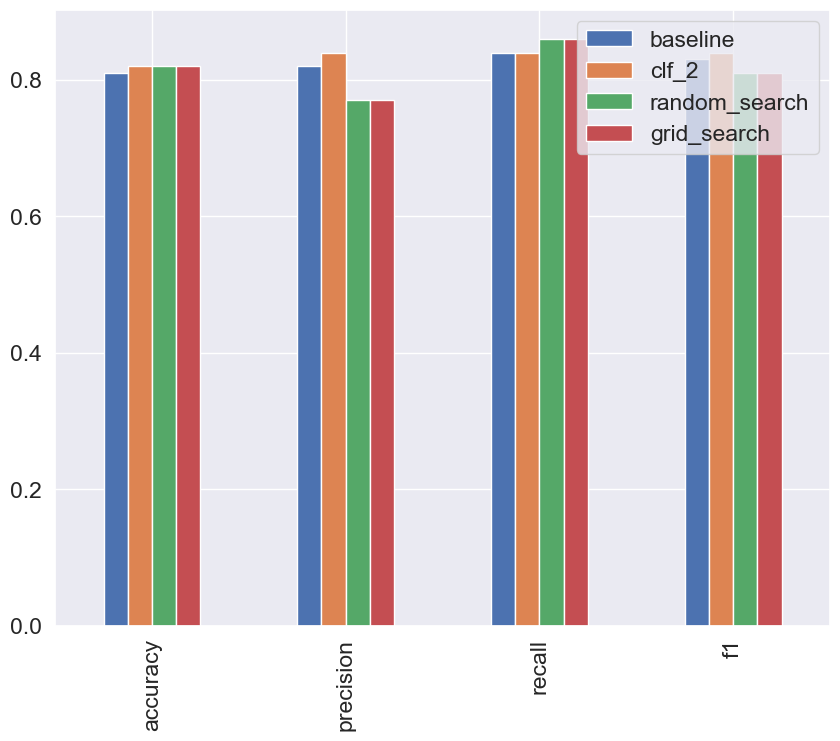

In [191]:
#lets compare different models metrics
compare_metrics=pd.DataFrame({"baseline":baseline_metrics,
                             "clf_2":clf_2_metrics,
                             "random_search":rs_metrics,
                             "grid_search":gs_metrics})

compare_metrics.plot.bar(figsize=(10,8))

## 6.saving and lodaing trained machine learning models

2ways:
* 'pickle'modeule
* 'joblib' module


In [195]:
#pickle
import pickle

#save an existing model to file
pickle.dump(gs_clf,open("gs_random_random_forest_model_1.pkl","wb"))

In [198]:
#load a saved model
loaded_pickle_model=pickle.load(open("gs_random_random_forest_model_1.pkl","rb"))

In [201]:
#make some predictions
pickle_y_preds=loaded_pickle_model.predict(x_test)
evaluate_preds(y_test,pickle_y_preds)

acc:81.97%
precision:0.77%
recall:0.86%
f1 score:0.81%


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

In [210]:
#joblib

from joblib import dump,load

#save model to file
dump(gs_clf,filename="gs_random_random_forest_model_1.joblib")
dump(gs_clf, filename="gs_random_random_forest_model_1.joblib") 

['gs_random_random_forest_model_1.joblib']

In [213]:
#import joblib model
loaded_joblib_model=load(filename="gs_random_random_forest_model_1.joblib")

In [214]:
# Make and evaluate joblib predictions 
joblib_y_preds = loaded_joblib_model.predict(X_test)
loaded_joblib_model_metrics = evaluate_preds(y_test, joblib_y_preds)
loaded_joblib_model_metrics

acc:47.54%
precision:0.44%
recall:0.50%
f1 score:0.47%


{'accuracy': 0.48, 'precision': 0.44, 'recall': 0.5, 'f1': 0.47}

## 7.putting it all together


In [217]:
data=pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [218]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [221]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

we want all this iin one step

* fil missing data
* convert data into numbers
* build a model on the data

In [228]:
#getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor(n_jobs=-1))])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

In [229]:
# Using grid search with pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"], # note the double underscore after each prefix "preprocessor__"
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   4.9s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strate

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model',
                                        RandomForestRegressor(n_jobs=-1))]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [230]:
# Score the best model
gs_model.score(X_test, y_test)

0.2848784564026806